# Esercitazione 4

## Exercise 04.1

The Molecular Dynamics / Monte Carlo (MD_MC) code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.

<span style="color:red">Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progresssive uncertainties.</span>

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

## Exercise 04.2

By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

## Termalizzazione 

Avviando la simulazione con i valori di temperatura desiderati si osserva che $T$ non rimane costante. <br> 
Di seguito viene mostrato il grafico della temperatura istantanea misurata nella simulazione molecolare del solido, del liquido e del gas, in funzione del numero di blocchi, ciascuno contenente un solo dato. Le temperature di partenza sono state scelte in modo che il valore istantaneo si stabilizzasse attorno al valore desiderato dopo un certo numero di blocchi: per il solido, $T_0 = 1.57$, per il liquido $T_0 = 2.05$, per il gas $T_0 = 0.98$. 

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

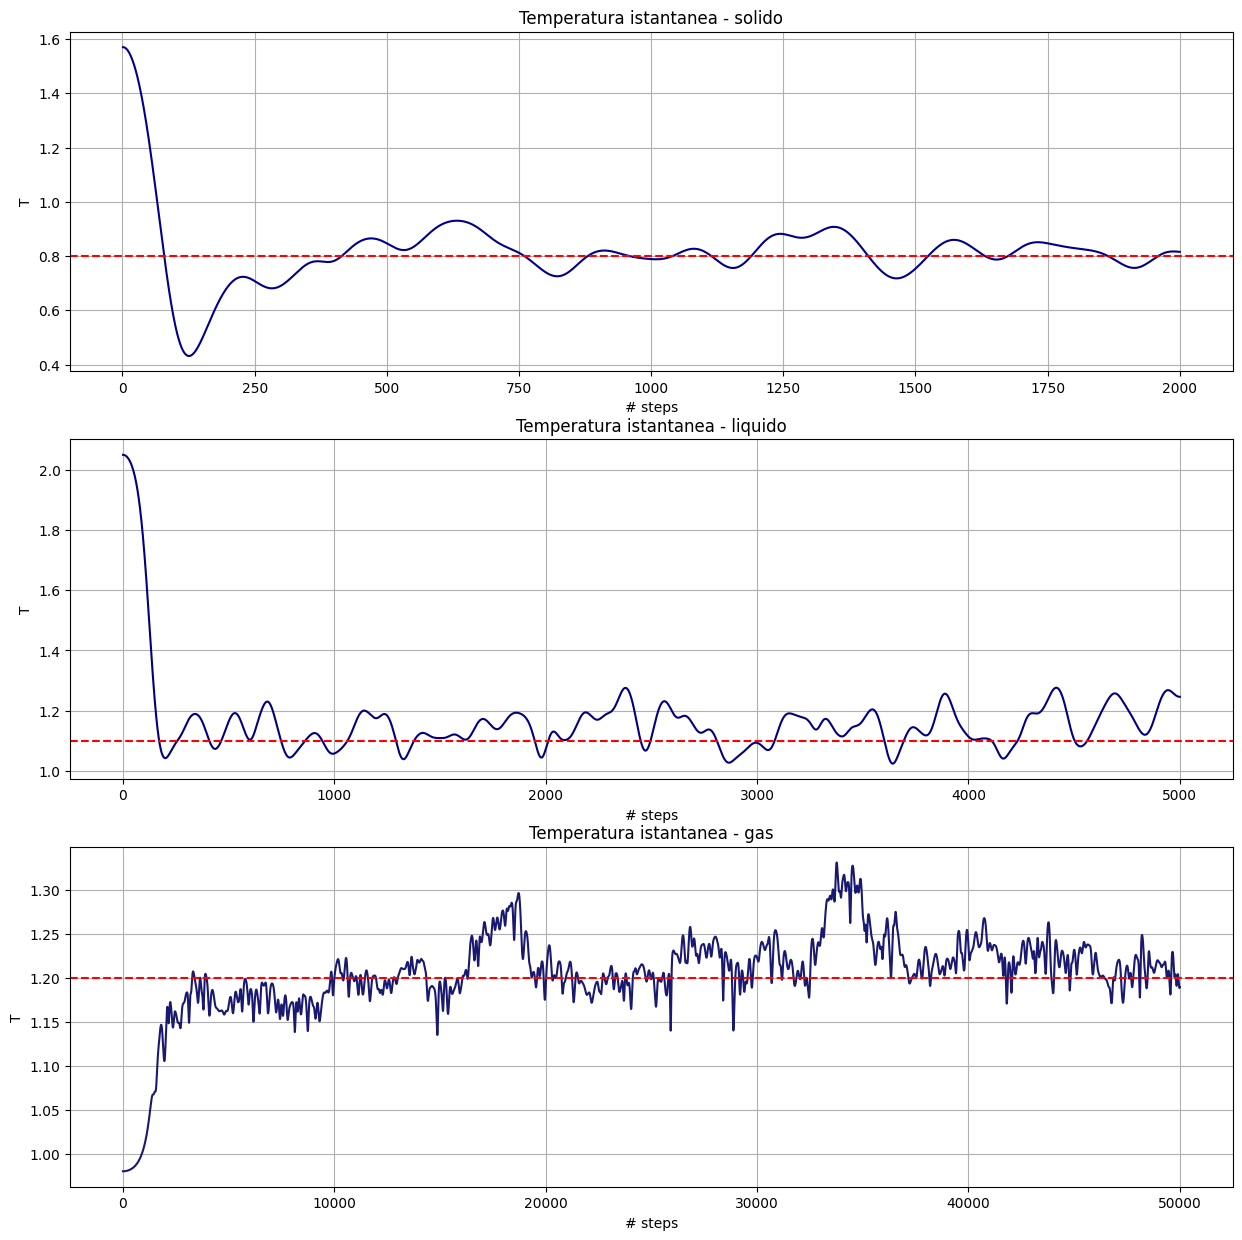

In [4]:
name = ["output_therm_solid.out", "output_therm_liquid.out", "output_therm_gas.out"]
title = ["Temperatura istantanea - solido", "Temperatura istantanea - liquido", "Temperatura istantanea - gas"]
y_label = "T"
x_label = "# steps"
color = ["darkblue", "navy", "midnightblue"]
target = [0.8, 1.1, 1.2] 

fig, axes = plt.subplots(3, 1, figsize=(15, 15))

for i in range(3): 
    
    data = np.loadtxt( name[i] )
    
    axes[i].plot(data[:,0], data[:,1], color=color[i])
    axes[i].set_title(title[i], fontsize=12)
    axes[i].axhline(y=target[i], color='r', linestyle='--')
    axes[i].set_xlabel(x_label)
    axes[i].set_ylabel(y_label)
    axes[i].grid(True)
    
plt.show()

La configurazione cristallina è quella che minimizza l'energia potenziale con le particelle ferme; dando alle particelle una velocità iniziale secondo la distribuzione di Maxwell-Boltzmann il sistema evolve verso un'energia potenziale più alta poiché la distanza tipica fra le particelle diminuisce. Dato che l'energia totale si conserva questo causa un abbassamento improvviso della temperatura per il solido e il liquido.
Il sistema successivamente tende ad equilibrarsi nella nuova temperatura, che è quella della configurazione di equilibrio.<br>

Nel gas, la temperatura anzichè diminuire aumenta. Questo è dovuto al fatto che la densità del gas è molto minore di quella del solido o del liquido, dunque la distanza tipica fra le particelle è più grande; lasciando evolvere il sistema dalla configurazione cristallina, l'energia potenziale tende a diminuire per la forma del potenziale di Lennard-Jones. In particolare, la distanza tipica iniziale fra le particelle è più alta della distanza che corrisponde al minimo del potenziale, quindi quando ci si sposta dalla configurazione cristallina la distanza tipica diminuisce, dunque l'energia potenziale diminuisce. La temperatura perciò aumenta poiché si conserva l'energia totale. <br>

Si osserva inoltre che solido e liquido termalizzano più velocemente del gas. 

## Misure

Per misurare le quantità richieste, la simulazione è stata riavviata dalla configurazione finale dopo la termalizzazione. La simulazione è stata eseguita con 100 blocchi, ciascuno di 2000 step.

### Solido

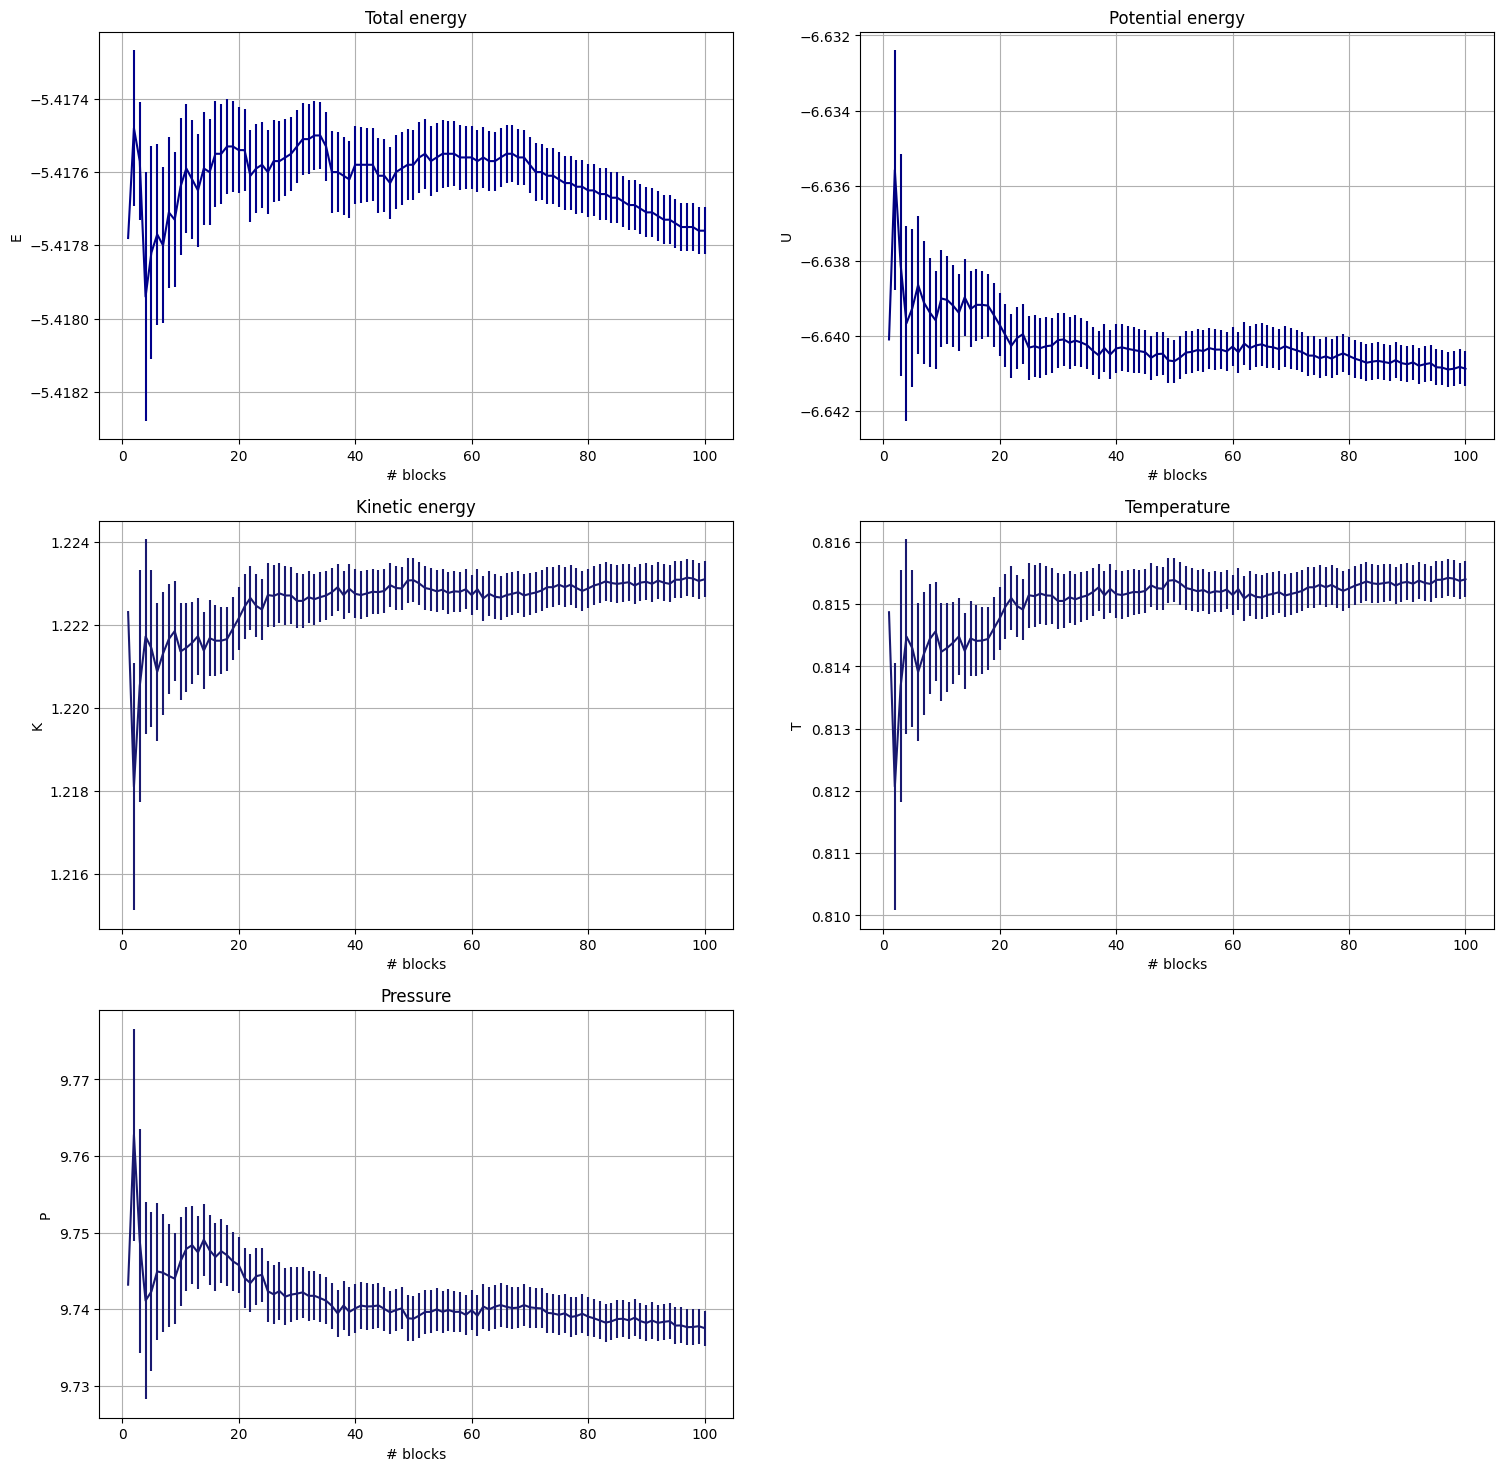

In [5]:
name = ["output_etot_solid.out", "output_epot_solid.out", "output_ekin_solid.out", "output_temp_solid.out", "output_pres_solid.out"]
title = ["Total energy", "Potential energy", "Kinetic energy", "Temperature", "Pressure"]
y_label = ["E", "U", "K", "T", "P"]
x_label = "# blocks"
color = ["darkblue", "navy", "midnightblue", "midnightblue", "midnightblue"] 

fig, axes = plt.subplots(3, 2, figsize=(18, 18))

for i in range(5): 
    
    ax = axes[ i//2, i%2 ]
    
    data = np.loadtxt( name[i] )
    
    ax.errorbar(data[:,0], data[:,2], yerr=data[:,3], color=color[i])
    ax.set_title(title[i], fontsize=12)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label[i])
    ax.grid(True)
    
axes[2][1].remove()
    
plt.show()

### Liquido

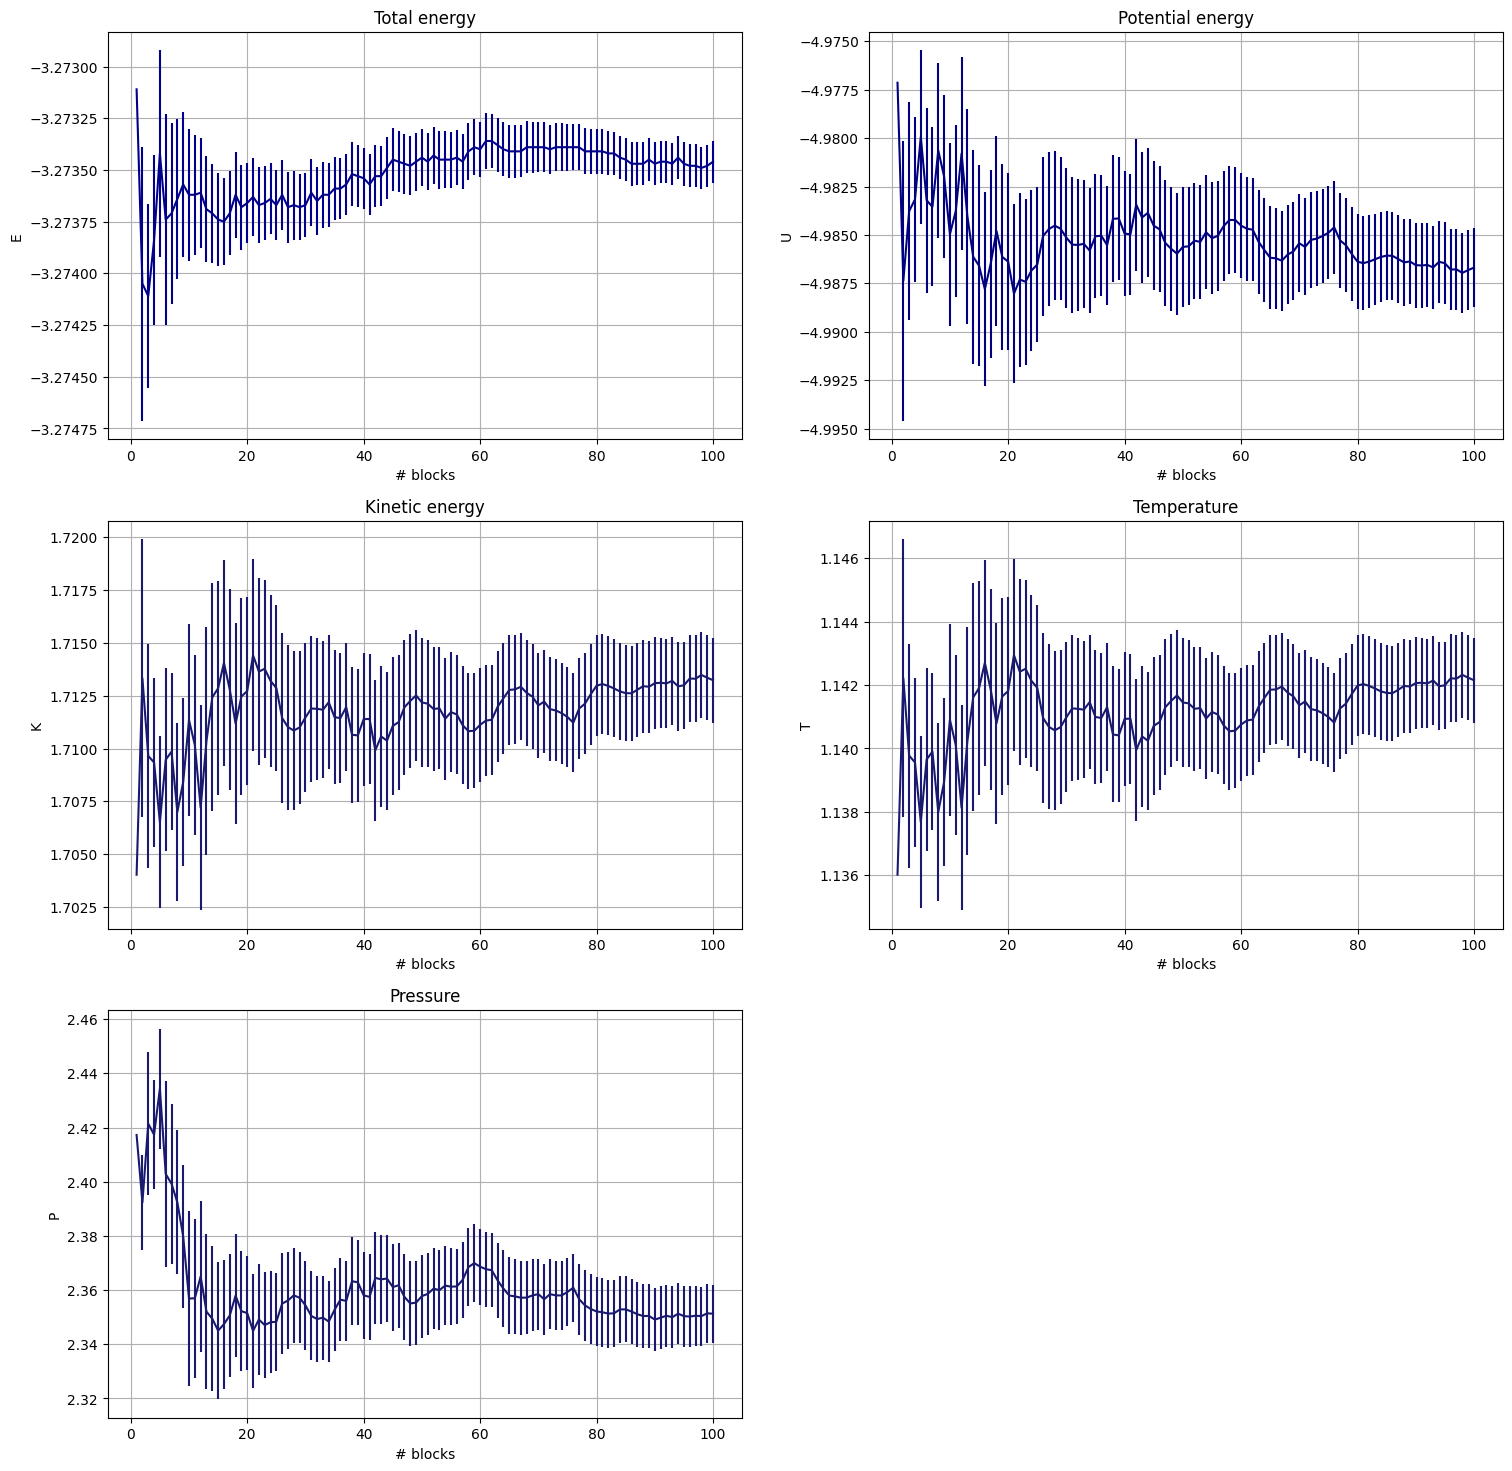

In [6]:
name = ["output_etot_liquid.out", "output_epot_liquid.out", "output_ekin_liquid.out", "output_temp_liquid.out", "output_pres_liquid.out"]
title = ["Total energy", "Potential energy", "Kinetic energy", "Temperature", "Pressure"]
y_label = ["E", "U", "K", "T", "P"]
x_label = "# blocks"
color = ["darkblue", "navy", "midnightblue", "midnightblue", "midnightblue"] 

fig, axes = plt.subplots(3, 2, figsize=(18, 18))

for i in range(5): 
    
    ax = axes[ i//2, i%2 ]
    
    data = np.loadtxt( name[i] )
    
    ax.errorbar(data[:,0], data[:,2], yerr=data[:,3], color=color[i])
    ax.set_title(title[i], fontsize=12)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label[i])
    ax.grid(True)
    
axes[2][1].remove()
    
plt.show()

### Gas

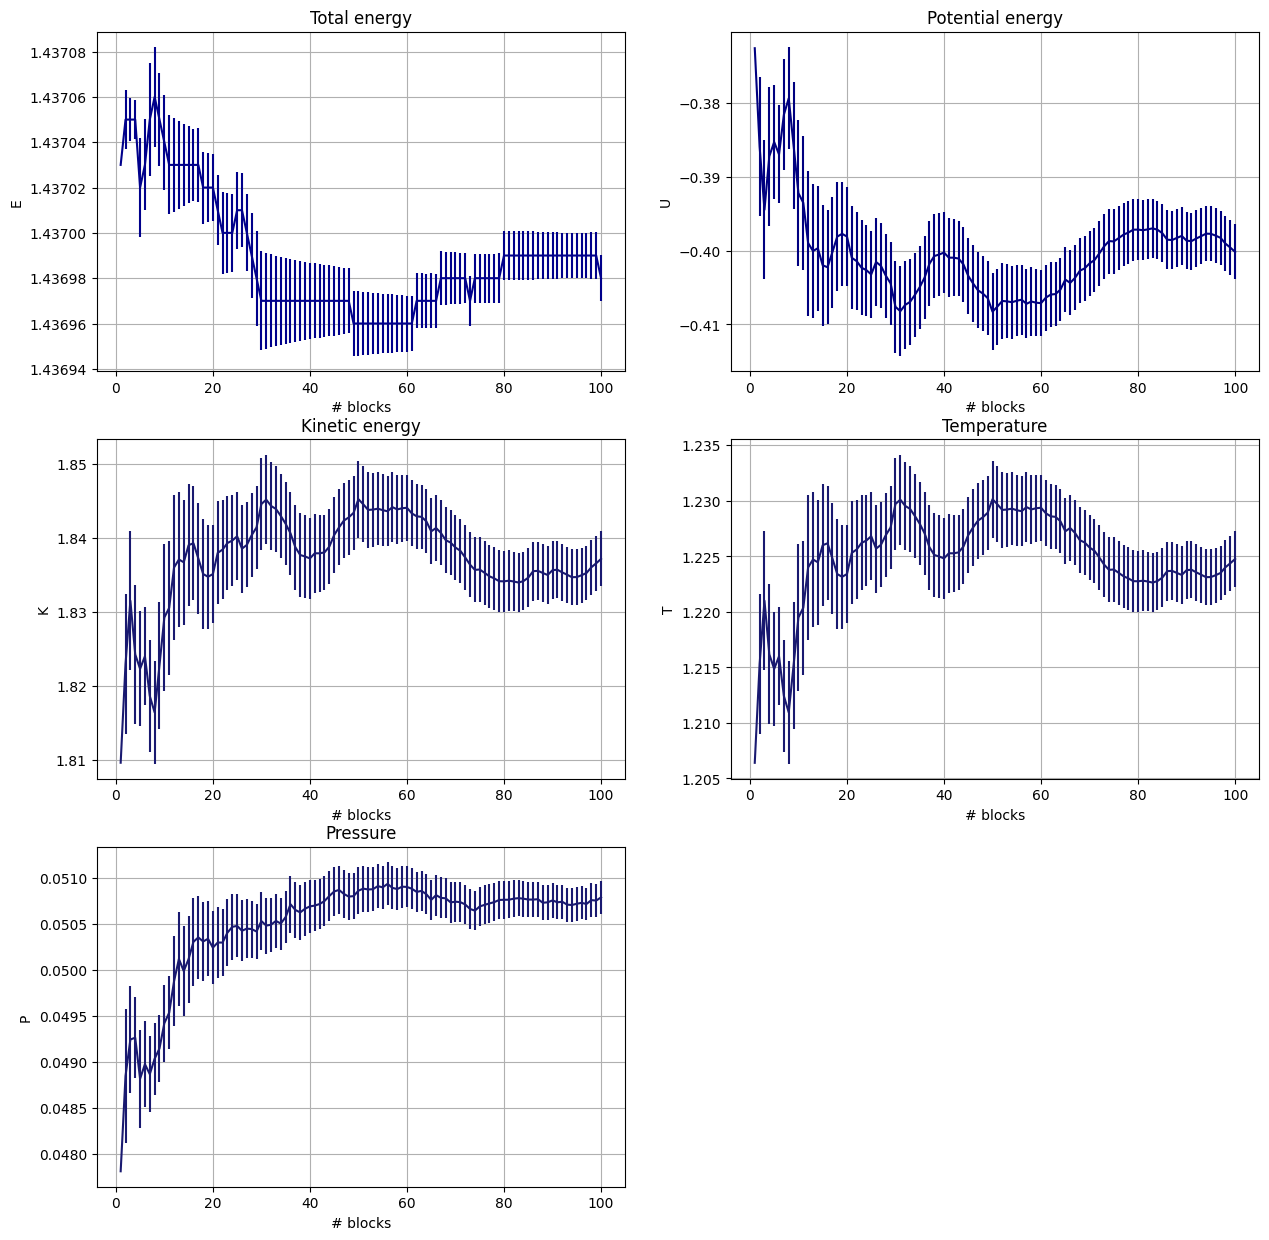

In [7]:
name = ["output_etot_gas.out", "output_epot_gas.out", "output_ekin_gas.out", "output_temp_gas.out", "output_pres_gas.out"]
title = ["Total energy", "Potential energy", "Kinetic energy", "Temperature", "Pressure"]
y_label = ["E", "U", "K", "T", "P"]
x_label = "# blocks"
color = ["darkblue", "navy", "midnightblue", "midnightblue", "midnightblue"] 

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for i in range(5): 
    
    ax = axes[ i//2, i%2 ]
    
    data = np.loadtxt( name[i] )
    
    ax.errorbar(data[:,0], data[:,2], yerr=data[:,3], color=color[i])
    ax.set_title(title[i], fontsize=12)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label[i])
    ax.grid(True)
    
axes[2][1].remove()
    
plt.show()